In [1]:
import warnings
warnings.filterwarnings('ignore')

### Creating Data

In [2]:
import numpy as np

In [3]:
np.random.seed(42)

Creating input or Independent variable

In [4]:
#Radians value for angles between  60 and 300
x = np.array([i*np.pi/180 for i in range(60, 300,4)])

In [5]:
x.shape

(60,)

Create Target Variable - Sine value with some noise

In [6]:
y = np.sin(x) + np.random.normal(0.0, 0.15, x.shape[0])

Build a Dataframe

In [7]:
import pandas as pd

In [8]:
train_df = pd.DataFrame(np.column_stack([x,y]), columns=['x','y'])

In [9]:
train_df.shape

(60, 2)

### Visualize the data

In [10]:
import matplotlib.pyplot as plt

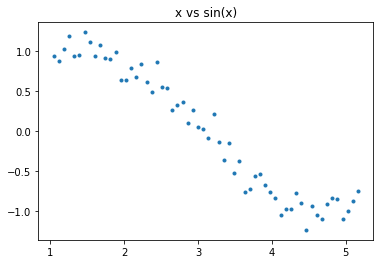

In [11]:
plt.plot(train_df['x'],train_df['y'],'.')
plt.title('x vs sin(x)')
plt.show()

### Building a Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression(normalize=True)
model.fit(train_df[['x']], train_df[['y']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

Visualize Prediction

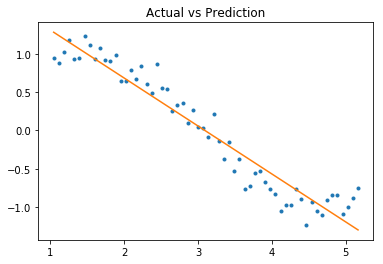

In [14]:
#Actual data
plt.plot(train_df['x'], train_df['y'], '.')

#Prediction
plt.plot(train_df['x'], model.predict(train_df[['x']]))
plt.title('Actual vs Prediction')
plt.show()

### AddingComplex features
Build Polynomial features

In [15]:
for i in range(2,16):
    
    train_df['x_' + str(i)] = train_df['x'] ** i

In [16]:
train_df.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1.047198,0.940533,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235
1,1.117011,0.878054,1.247713,1.393709,1.556788,1.738948,1.942424,2.169709,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479
2,1.186824,1.024337,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521
3,1.256637,1.179511,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819710,12.339811,15.506664,19.486248,24.487142,30.771450
4,1.326450,0.935173,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,16.862020,22.366630,29.668222,39.353420,52.200353,69.241170


### Function to Build model with Polynomials

Build a Dataframe to store Results

In [35]:
columns = ['Loss'] + ['W_%d'%i for i in range(1,16)]
idx = ['power_%d'%i for i in range(1,16)]
results_df = pd.DataFrame(index=idx, columns=columns)

In [36]:
results_df.head()

,Loss,W_1,W_2,W_3,W_4,W_5,W_6,W_7,W_8,W_9,W_10,W_11,W_12,W_13,W_14,W_15
power_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


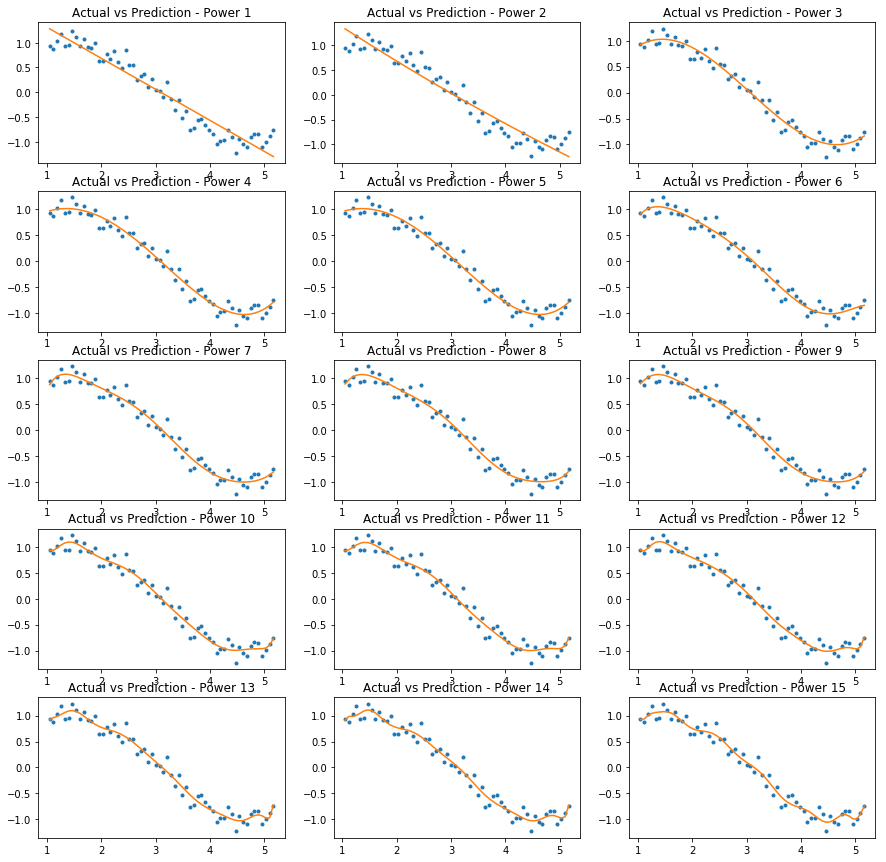

In [37]:
plt.subplots(nrows=5,ncols=3, figsize=(15,15))

for i in range(1, 16):
    
    #Select Features to us
    features = ['x']
    
    for j in range(2,i+1):
        
        features.append('x_' + str(j))
           
    #Build Model
    model = LinearRegression(normalize=True)
    model.fit(train_df[features], train_df[['y']])
    
    y_pred = model.predict(train_df[features])
    
    #Plot the output
    plt.subplot(5,3,i)
    plt.plot(train_df['x'], train_df['y'], '.')
    plt.plot(train_df['x'], y_pred)
    plt.title('Actual vs Prediction - Power ' + str(i))
    
    #Calculate metrices
    #Loss or Error
    results_df.loc['power_' + str(i), 'Loss'] = np.sum(np.square(y_pred - np.array(train_df[['y']])))
    
    #Get Weights values
    for j in range(1, i+1):
        
        results_df.loc['power_%d'%i, 'W_%d'%j] = model.coef_[0][j-1]    
    
plt.show()

In [38]:
results_df

,Loss,W_1,W_2,W_3,W_4,W_5,W_6,W_7,W_8,W_9,W_10,W_11,W_12,W_13,W_14,W_15
power_1,2.76495,-0.626096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_2,2.72871,-0.742934,0.0188043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_3,0.987025,2.49244,-1.12667,0.122905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_4,0.963904,1.19347,-0.398498,-0.0441913,0.0134465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_5,0.963896,1.11403,-0.337133,-0.0662893,0.0171918,-0.000241112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_6,0.928821,17.349,-16.354,7.87087,-2.07911,0.281264,-0.0151021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_7,0.911529,51.9778,-57.9649,34.2424,-11.6368,2.27071,-0.236262,0.0101697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_8,0.90884,11.2552,-0.257822,-10.4021,9.04177,-3.61937,0.774528,-0.0856789,0.00385655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
power_9,0.90833,-40.9344,84.9481,-88.3244,53.1136,-19.642,4.52794,-0.633346,0.0491304,-0.00161923,NaN,NaN,NaN,NaN,NaN,NaN
power_10,0.885511,-1059.46,1967.25,-2076.02,1383.1,-609.807,180.736,-35.6561,4.49254,-0.32718,0.0104793,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Weights increasing exponentially with higher order

### Build L2 Regression

In [39]:
from sklearn.linear_model import Ridge

In [40]:
lambda_l2 = [1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

In [41]:
columns = ['Lambda','Loss'] + ['W_%d'%i for i in range(1,16)]
idx = ['lambda_%d'%i for i in range(1,len(lambda_l2)+1)]
L2_df = pd.DataFrame(index=idx, columns=columns)

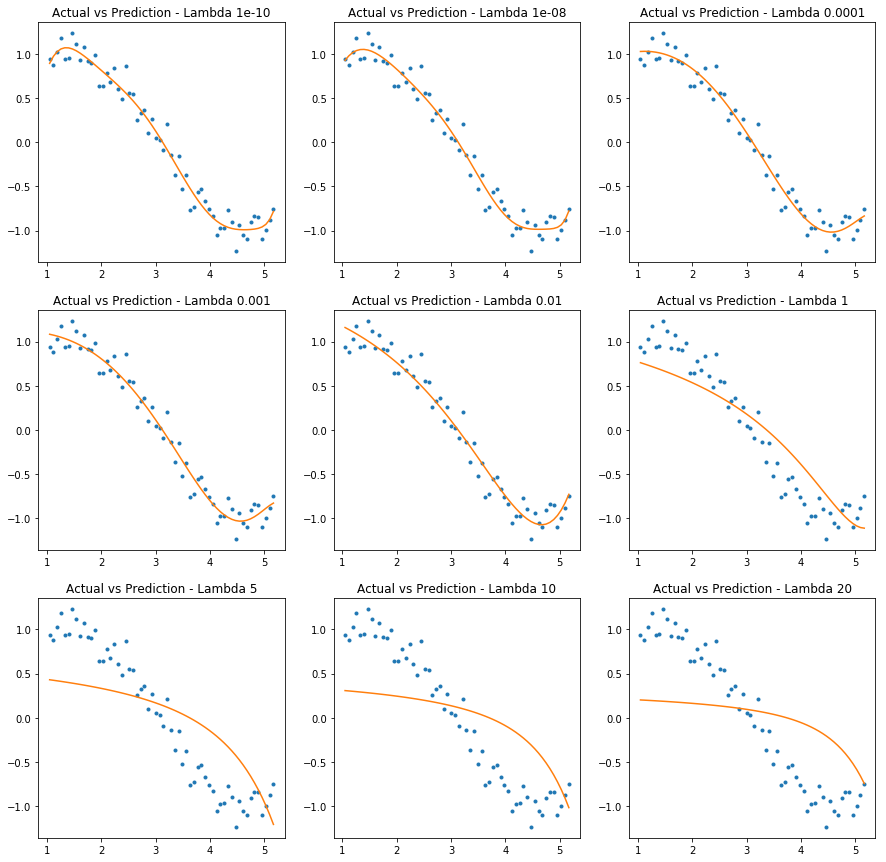

In [42]:
plt.subplots(nrows=3,ncols=3, figsize=(15,15))

for i in range(len(lambda_l2)):
    
    #Select all features
    features = ['x']
    
    for j in range(2,16):
        
        features.append('x_' + str(j))
           
    #Build Model
    model = Ridge(alpha=lambda_l2[i], normalize=True)
    model.fit(train_df[features], train_df[['y']])
    
    y_pred = model.predict(train_df[features])
    
    #Plot the output
    plt.subplot(3,3,i+1)
    plt.plot(train_df['x'], train_df['y'], '.')
    plt.plot(train_df['x'], y_pred)
    plt.title('Actual vs Prediction - Lambda ' + str(lambda_l2[i]))
    
    #Calculate metrices
    #Loss or Error
    L2_df.loc['lambda_' + str(i+1), 'Lambda'] = lambda_l2[i] 
    L2_df.loc['lambda_' + str(i+1), 'Loss'] = np.sum(np.square(y_pred - np.array(train_df[['y']])))
    
    #Get Weights values
    for j in range(1, 16):
        
        L2_df.loc['lambda_' + str(i+1), 'W_' + str(j)] = model.coef_[0][j-1]    
    
plt.show()

In [28]:
L2_df

,Lambda,Loss,W_1,W_2,W_3,W_4,W_5,W_6,W_7,W_8,W_9,W_10,W_11,W_12,W_13,W_14,W_15
lambda_1,1e-10,0.906965,22.8956,-19.6576,7.33764,-0.798461,-0.178356,0.0225686,0.00746782,-1.88594e-05,-0.000266375,-3.58163e-05,5.16989e-06,2.20532e-06,3.84023e-08,-1.11324e-07,1.00634e-08
lambda_2,1e-08,0.915731,7.95062,-5.18696,1.14906,0.0391431,-0.0286312,-0.00420257,0.000170255,0.000153531,2.70879e-05,1.58222e-06,-4.33136e-07,-1.56393e-07,-2.61503e-08,-1.065e-09,1.15256e-09
lambda_3,0.0001,0.964554,0.443504,-0.153014,-0.0236952,-0.00162414,0.000159073,8.25164e-05,1.87536e-05,3.12197e-06,3.82297e-07,2.19017e-08,-5.02386e-09,-2.17758e-09,-4.73166e-10,-5.62193e-11,6.20518e-12
lambda_4,0.001,1.00296,0.107039,-0.0836981,-0.0161982,-0.00188717,-8.69824e-05,2.67025e-05,1.05044e-05,2.47109e-06,4.66039e-07,7.3598e-08,9.14144e-09,5.6325e-10,-1.43071e-10,-7.64744e-11,-2.3706e-11
lambda_5,0.01,1.19634,-0.189831,-0.0492728,-0.00829456,-0.00105703,-8.66923e-05,3.11648e-06,3.44851e-06,1.00282e-06,2.19668e-07,4.08393e-08,6.51927e-09,8.30427e-10,5.29625e-11,-1.40823e-11,-7.90941e-12
lambda_6,1,5.47237,-0.14533,-0.0197107,-0.00302392,-0.000462945,-6.86553e-05,-9.66257e-06,-1.24539e-06,-1.33865e-07,-7.57026e-09,1.67052e-09,8.59789e-10,2.58319e-10,6.5774e-11,1.54448e-11,3.45749e-12
lambda_7,5,14.0856,-0.0604965,-0.00864792,-0.0014269,-0.000240561,-4.05309e-05,-6.79051e-06,-1.12937e-06,-1.862e-07,-3.03736e-08,-4.88802e-09,-7.72683e-10,-1.19165e-10,-1.77292e-11,-2.49284e-12,-3.16976e-13
lambda_8,10,18.3678,-0.0380485,-0.00558684,-0.000952295,-0.000166778,-2.93586e-05,-5.17175e-06,-9.11019e-07,-1.60478e-07,-2.8271e-08,-4.98108e-09,-8.77684e-10,-1.54644e-10,-2.72417e-11,-4.79669e-12,-8.43994e-13
lambda_9,20,23.0792,-0.0228582,-0.00343119,-0.000599796,-0.000108,-1.95882e-05,-3.56186e-06,-6.48782e-07,-1.18371e-07,-2.16351e-08,-3.96159e-09,-7.26743e-10,-1.33562e-10,-2.45898e-11,-4.53482e-12,-8.37655e-13


In [43]:
#Weights has somewhat been controlled

### L1 Regression (Lasso Regression)

In [44]:
from sklearn.linear_model import Lasso

In [45]:
lambda_l1 = [1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

In [46]:
columns = ['Lambda','Loss'] + ['W_%d'%i for i in range(1,16)]
idx = ['lambda_%d'%i for i in range(1,len(lambda_l1)+1)]
L1_df = pd.DataFrame(index=idx, columns=columns)

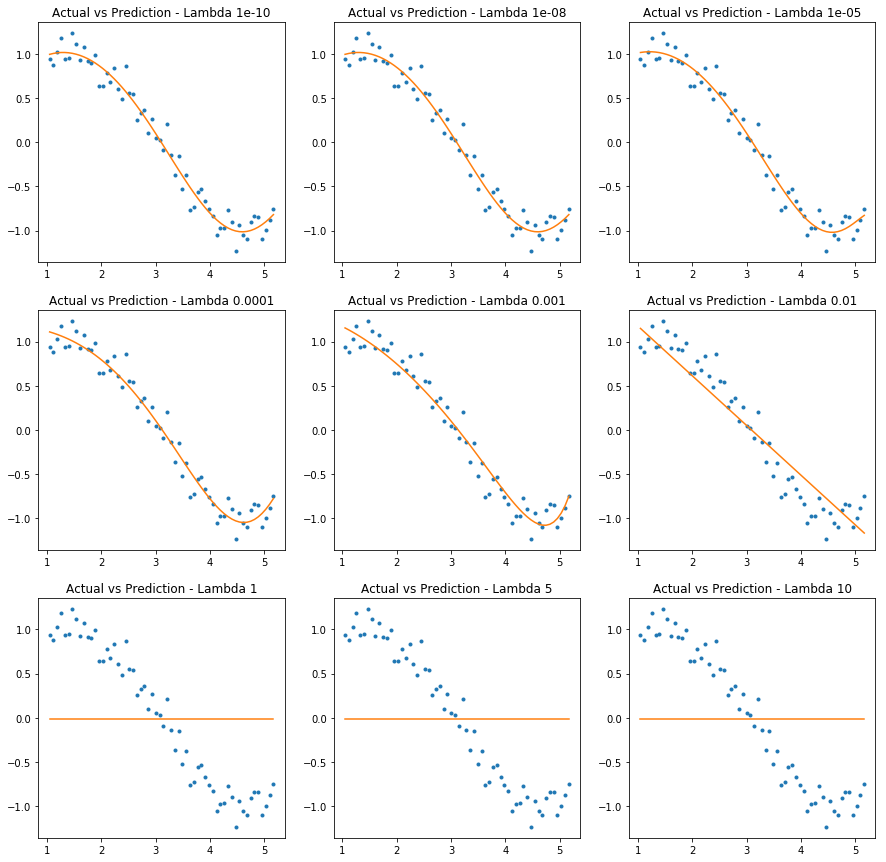

In [47]:
plt.subplots(nrows=3,ncols=3, figsize=(15,15))

for i in range(len(lambda_l1)):
    
    #Select all features
    features = ['x']
    
    for j in range(2,16):
        
        features.append('x_' + str(j))
           
    #Build Model
    model = Lasso(alpha=lambda_l1[i], normalize=True, max_iter=1e5)
    model.fit(train_df[features], train_df[['y']])
    
    y_pred = model.predict(train_df[features])
    
    #Plot the output
    plt.subplot(3,3,i+1)
    plt.plot(train_df['x'], train_df['y'], '.')
    plt.plot(train_df['x'], y_pred)
    plt.title('Actual vs Prediction - Lambda ' + str(lambda_l1[i]))
    
    #Calculate metrices
    #Loss or Error
    L1_df.loc['lambda_' + str(i+1), 'Lambda'] = lambda_l1[i] 
    L1_df.loc['lambda_' + str(i+1), 'Loss'] = np.sum(np.square(y_pred - np.array(train_df[['y']])))
    
    #Get Weights values
    for j in range(1, 16):
        
        L1_df.loc['lambda_' + str(i+1), 'W_' + str(j)] = model.coef_[j-1]    
    
plt.show()

In [48]:
L1_df

,Lambda,Loss,W_1,W_2,W_3,W_4,W_5,W_6,W_7,W_8,W_9,W_10,W_11,W_12,W_13,W_14,W_15
lambda_1,1e-10,4399.95,0.89281,-0.342764,-0.000447983,-0.000589436,-7.46227e-06,7.01018e-05,2.26921e-05,4.0868e-06,4.20085e-07,-1.07662e-08,-1.66268e-08,-4.45389e-09,-7.05977e-10,-2.60942e-11,3.09518e-11
lambda_2,1e-08,4399.95,0.89401,-0.343442,-0.000340122,-0.000586942,-6.11002e-06,7.03649e-05,2.2584e-05,4.04736e-06,4.11593e-07,-7.69853e-09,-1.67088e-08,-4.45198e-09,-6.99936e-10,-2.3669e-11,3.03001e-11
lambda_3,1e-05,4397.09,0.705468,-0.274095,-0.00934456,-0,0,7.96468e-05,2.45432e-05,9.0089e-07,0,0,0,-0,-0,-0,-1.68041e-11
lambda_4,0.0001,4381.2,0,-0.0469564,-0.0266458,-0,0,0,1.10102e-05,4.84654e-06,0,0,0,0,-0,-0,-1.16448e-11
lambda_5,0.001,4308.61,-0.0831165,-0.113312,-0,-0,0,0,0,0,0,0,9.01248e-09,1.95723e-09,0,0,0
lambda_6,0.01,3890.96,-0.562029,-0,-0,-0,-0,-0,-0,0,0,0,0,0,0,0,0
lambda_7,1,2228.71,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
lambda_8,5,2228.71,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
lambda_9,10,2228.71,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


In [ ]:
# Weights are far more controlled than L2